# **LINKEDIN APP SENTIMENT ANALYSIS**

## OBJECTIVE:

App Reviews Sentiments Analysis is a fascinating and practical data science project. It involves using **data analysis** techniques to determine whether the sentiments in these reviews are positive, negative, or neutral. 

## PROCESS:

Here is a step-by-step process to follow:

- Collect a dataset of app reviews.
- Conduct Exploratory Data Analysis (EDA) by analyzing factors such as the length of the reviews and their associated ratings.
- Label the sentiment data using tools like TextBlob or NLTK.
- Gain an understanding of the overall distribution of sentiments (positive, negative, neutral) in the dataset.
- Explore the relationship between sentiments and the corresponding ratings provided.
- Analyze the text of the reviews to identify common themes or words within different sentiment categories.

The process begins with the collection of an app review dataset. We have identified an ideal dataset for this purpose, which you can download from [here](http://https://www.kaggle.com/datasets/bwandowando/320k-linkedin-app-google-store-reviews).

Now, let's initiate the task of analyzing Linkedin app reviews' sentiments by importing the essential Python libraries and the dataset.

In [1]:
# Import needed libraries

# Import pandas for data wrangling and data analysis

import pandas as pd

# Import matplotlib and seaborn for data visualization 

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load the dataset

linkedin_data = pd.read_csv('/kaggle/input/linkedin-reviews/LINKEDIN_REVIEWS.csv')

In [6]:
# Display the first 10 rows of the dataset 

linkedin_data.head(10)

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,152618553977019693742,A Google user,Well designed app. It's much easier to use tha...,5,0,1.0.3,2011-04-07 15:57:52
1,1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,234382942865437071667,A Google user,Cool!,5,1,1.0.0,2011-04-07 15:59:50
2,2,bbae055c-f20b-4c01-b604-7cea72416a3a,174473604608358796368,A Google user,Great to finally see this on the market!,5,0,2.0.5,2011-04-07 16:16:02
3,3,38a13596-b208-423d-8d96-3199e1993138,286593453219054880269,A Google user,Great app,5,1,1.0.0,2011-04-07 16:22:27
4,4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,167276875678680630145,A Google user,Finally! Would love a Homeycomb specific versi...,4,0,1.0.0,2011-04-07 17:41:58
5,5,e615eba7-021f-4252-9343-fea866e6547a,279544562364680964711,A Google user,Missing contact synching found in other apps l...,4,2,1.0.0,2011-04-07 17:50:13
6,6,cf51dd80-2b01-458a-8056-f792732e9fd8,194594231700116278497,A Google user,What are you talking about? It does have synch...,5,0,1.0.0,2011-04-07 17:59:02
7,7,2c952afc-bf23-49e1-b594-beb339c23139,299572542228213240681,A Google user,Works fine but where is the inbox.clearly says...,4,0,1.0.0,2011-04-07 18:02:58
8,8,fd122504-5c20-4c42-be1b-c9916f596b2d,283295985056957279128,A Google user,I've been waiting for ages really for an offic...,5,2,1.0.0,2011-04-07 18:19:29
9,9,c5b847b4-4643-4932-90ac-fa0a290a2458,165673340173097386145,A Google user,Force closes every time I try and do anything ...,1,0,1.0.0,2011-04-07 18:53:28


In [11]:
# More info about the dataset

linkedin_data.shape

(322641, 9)

The dataset contains nine (9) columns: index, review_id, pseudo_author_id, author_name, review_text, review_rating, review_likes, author_app_version, review_timestamp. 

In [13]:
# Examine the column info

linkedin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322641 entries, 0 to 322640
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          322641 non-null  int64 
 1   review_id           322641 non-null  object
 2   pseudo_author_id    322641 non-null  object
 3   author_name         322641 non-null  object
 4   review_text         320925 non-null  object
 5   review_rating       322641 non-null  int64 
 6   review_likes        322641 non-null  int64 
 7   author_app_version  255635 non-null  object
 8   review_timestamp    322641 non-null  object
dtypes: int64(3), object(6)
memory usage: 22.2+ MB


### Exploratory Data Analysis

Now, let's delve into this data methodically. We'll start by analyzing the distribution of ratings to gain insights into the overall sentiment of the reviews. Following that, we can extend our exploration to other aspects, such as reviewing the length of the reviews and potentially extracting insights from the textual content.

Let's initiate by examining the distribution of ratings:

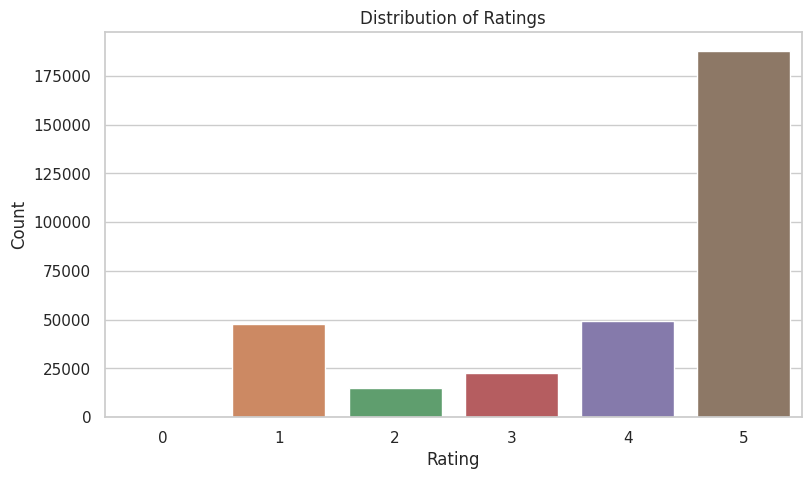

In [14]:
# Plot the distribution of ratings:

sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=linkedin_data, x='review_rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Here is the distribution of ratings from the LinkedIn reviews dataset. As evident, it provides a clear representation of the number of reviews within each rating category, ranging from 1 to 5.

Subsequently, we will delve into the analysis of review lengths, recognizing that this aspect can occasionally correlate with the sentiment or depth of feedback. Initially, we'll compute the length of each review and then proceed to visualize the data.

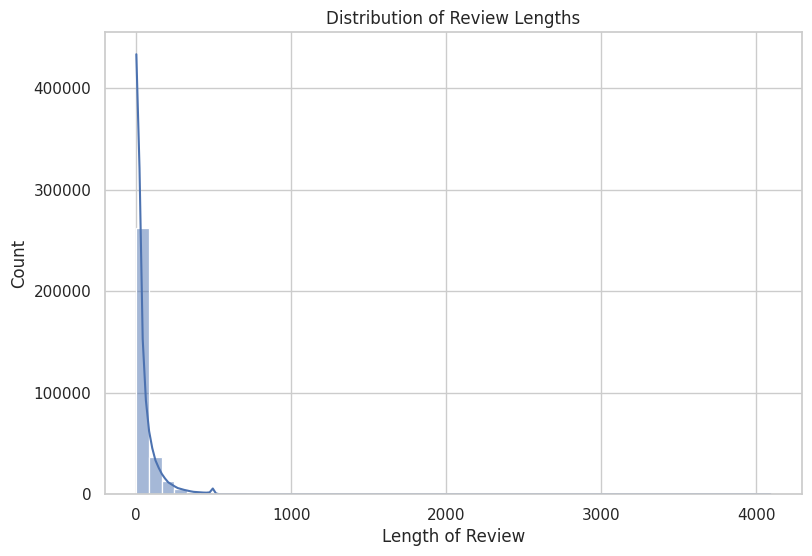

In [15]:
# Calculate the length of each review

linkedin_data['Review Length'] = linkedin_data['review_text'].astype(str).apply(len)

# Plot the distribution of review lengths

plt.figure(figsize=(9, 6))
sns.histplot(linkedin_data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

### Incorporate Sentiment Labels into the Data.

Now, let's proceed to label the data with sentiments. For this task, we can utilize TextBlob. TextBlob assigns a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. Utilizing this score, we can classify each review's sentiment as positive, neutral, or negative.

In [16]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyze the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classify based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply TextBlob sentiment analysis to the reviews

linkedin_data['Sentiment'] = linkedin_data['review_text'].astype(str).apply(textblob_sentiment_analysis)

# Display the first 10 rows with the sentiment

linkedin_data.head(10)

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,Review Length,Sentiment
0,0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,152618553977019693742,A Google user,Well designed app. It's much easier to use tha...,5,0,1.0.3,2011-04-07 15:57:52,73,Positive
1,1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,234382942865437071667,A Google user,Cool!,5,1,1.0.0,2011-04-07 15:59:50,5,Positive
2,2,bbae055c-f20b-4c01-b604-7cea72416a3a,174473604608358796368,A Google user,Great to finally see this on the market!,5,0,2.0.5,2011-04-07 16:16:02,40,Positive
3,3,38a13596-b208-423d-8d96-3199e1993138,286593453219054880269,A Google user,Great app,5,1,1.0.0,2011-04-07 16:22:27,9,Positive
4,4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,167276875678680630145,A Google user,Finally! Would love a Homeycomb specific versi...,4,0,1.0.0,2011-04-07 17:41:58,56,Positive
5,5,e615eba7-021f-4252-9343-fea866e6547a,279544562364680964711,A Google user,Missing contact synching found in other apps l...,4,2,1.0.0,2011-04-07 17:50:13,70,Negative
6,6,cf51dd80-2b01-458a-8056-f792732e9fd8,194594231700116278497,A Google user,What are you talking about? It does have synch...,5,0,1.0.0,2011-04-07 17:59:02,50,Neutral
7,7,2c952afc-bf23-49e1-b594-beb339c23139,299572542228213240681,A Google user,Works fine but where is the inbox.clearly says...,4,0,1.0.0,2011-04-07 18:02:58,129,Positive
8,8,fd122504-5c20-4c42-be1b-c9916f596b2d,283295985056957279128,A Google user,I've been waiting for ages really for an offic...,5,2,1.0.0,2011-04-07 18:19:29,136,Positive
9,9,c5b847b4-4643-4932-90ac-fa0a290a2458,165673340173097386145,A Google user,Force closes every time I try and do anything ...,1,0,1.0.0,2011-04-07 18:53:28,112,Neutral


The dataset has now been enriched with sentiment labels for each review, categorizing them as Positive, Negative, or Neutral based on the polarity score calculated by TextBlob.

### Analyze Linkedin App Reviews Sentiments

With our dataset now labeled, let's proceed with the sentiment analysis of app reviews. We'll initiate by examining the distribution of sentiments across the dataset, providing us with a fundamental understanding of the prevailing sentiment tendencies in the reviews.

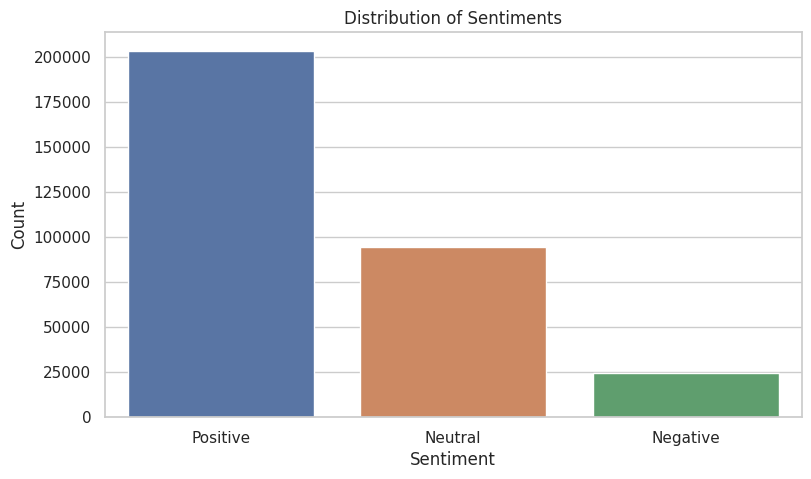

In [17]:
# Analyze the distribution of sentiments

sentiment_distribution = linkedin_data['Sentiment'].value_counts()

# Plot the distribution of sentiments

plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Therefore, despite the app receiving low ratings, it is noteworthy that the reviewers do not employ many negative words in their feedback for the application.

Subsequently, let's delve into the exploration of the relationship between sentiments and ratings. This analysis aims to elucidate whether there is a correlation between the sentiment of the text and the numerical rating. To accomplish this, we will examine how sentiments are distributed across different rating levels.

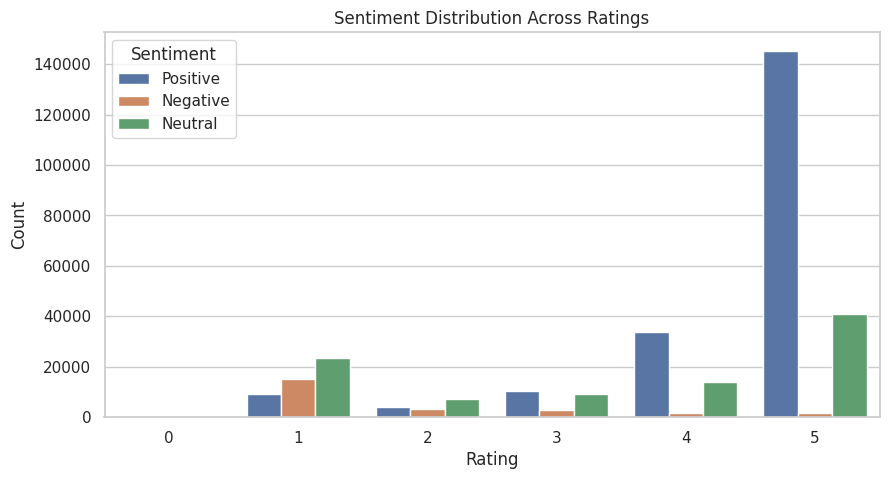

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=linkedin_data, x='review_rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Now, let's conduct a text analysis to identify common words or themes within each sentiment category. This entails examining the most frequently occurring words in positive, negative, and neutral reviews through the use of a word cloud.

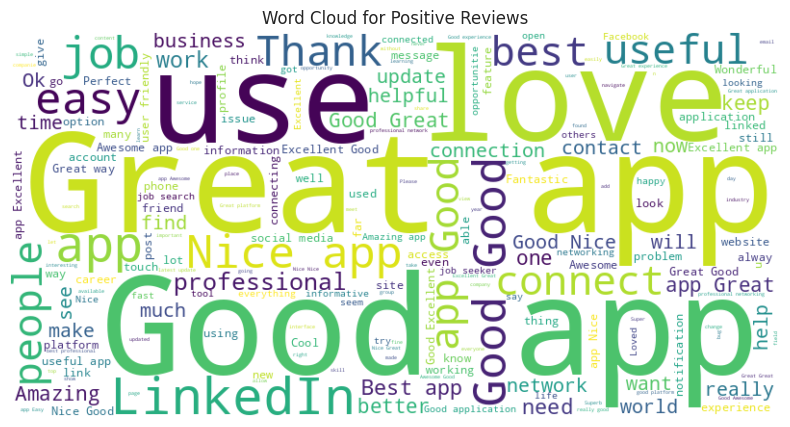

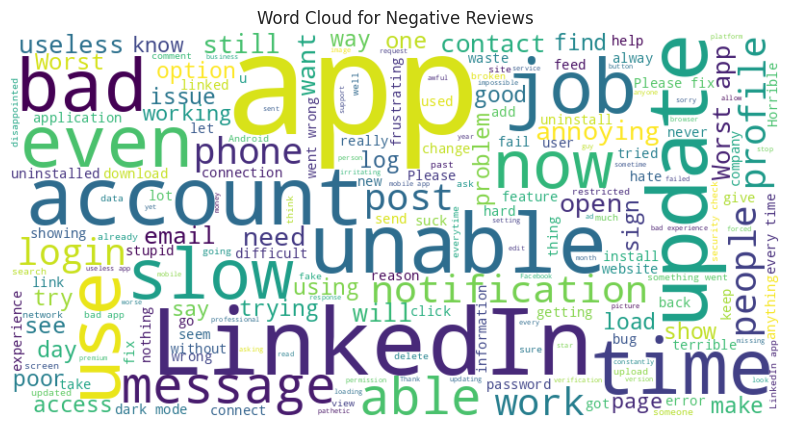

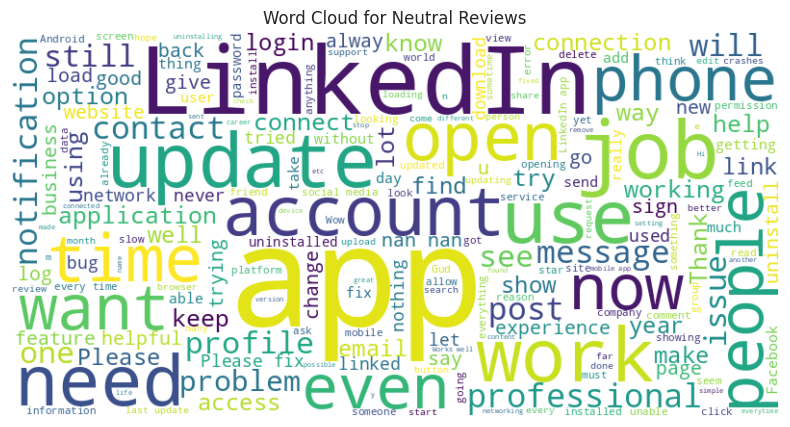

In [19]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment

def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_data[linkedin_data['Sentiment'] == sentiment]['review_text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment

for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

## SUMMARY

In this data science portfolio project, we conducted a comprehensive sentiment analysis on LinkedIn app reviews. The project began with the collection and exploration of a diverse dataset, followed by meticulous labeling of sentiments using TextBlob. Analyzing the distribution of ratings and exploring the relationship between sentiments and ratings provided valuable insights into user perceptions. Leveraging text analysis techniques, we identified common themes and words within each sentiment category, shedding light on user sentiments. 

This project serves as a robust demonstration of applying data science methodologies to extract actionable insights from user feedback, offering a strategic advantage for app developers and businesses aiming to enhance user experience on the LinkedIn platform.